In [1]:
from numpy import loadtxt
import numpy as np
import math
import matplotlib.pyplot as plt
import pprint
import pandas as pd
from IPython.display import display, HTML

In [2]:
#Loading Data Files
#Features
trainingData = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW4/DataFiles/trainingData.txt", delimiter=",",unpack=False,dtype=np.float128)
testData = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW4/DataFiles/testData.txt", delimiter=",", unpack=False,dtype=np.float128)
validationData = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW4/DataFiles/validationData.txt", delimiter=",",unpack=False,dtype=np.float128)

#Labels
trainingLabels = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW4/DataFiles/trainingLabels.txt",unpack=False,dtype=np.float128)
testLabels = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW4/DataFiles/testLabels.txt",unpack=False,dtype=np.float128)
validationLabels = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW4/DataFiles/validationLabels.txt",unpack=False,dtype=np.float128)

In [3]:
#Normalization
trainingData_norm = (trainingData/128.0)-1.0
testData_norm = (testData/128.0)-1.0
validationData_norm = (validationData/128.0)-1.0

In [4]:
trainingData_norm=trainingData_norm[:300]
testData_norm=testData_norm[:100]
validationData_norm=validationData_norm[:100]
trainingLabels=trainingLabels[:300]
testLabels=testLabels[:100]
validationLabels=validationLabels[:100]

In [5]:
#Function to calculate gradient
def calculate_k(x,y):
    return np.power((np.dot(x,y.T)/784+1),3)

k=calculate_k(trainingData_norm,trainingData_norm)

In [25]:
def calculate_gradient_a(a,k_a_b,lamda):
    y=trainingLabels
    N=len(y)
    gradient=np.zeros((N,),dtype=np.float128)
    for yp,p in zip(y,range(N)):
        value=1-(yp*(k_a_b[p]))
        if value>0:
            gradient+=-1.0*(yp)*(k[p].T)
            
    gradient/=N
    gradient=np.reshape(gradient,(N,1))
    gradient+=((lamda/2.0)*np.dot((k+k.T),a))
    return gradient

def calculate_gradient_b(a,k_a_b,lamda):
    y=trainingLabels
    gradient=0
    N=len(y)
    for yp,p in zip(y,range(N)):
        value=1-(yp*(k_a_b[p]))
        if value>0:
            gradient+=-1.0*yp
    gradient/=N
    return gradient

#Main Function for Gradient Descent
def gradient_descent(T,learning_rate,lamda):
    a=np.zeros((len(trainingData_norm),1), dtype=np.float128)
    b=0
    for t in range(1,T+1):
        k_a_b=np.dot(k,a)+b
        gradient_a=calculate_gradient_a(a,k_a_b,lamda)
        gradient_b=calculate_gradient_b(a,k_a_b,lamda)
        a-=(learning_rate*gradient_a)
        b-=(learning_rate*gradient_b)
    return a,b

#Function to calculate Error
def calculate_error(a,b,x,y):
    x_train=trainingData_norm
    N=len(y)
    k_=calculate_k(x,x_train)
    prediction=np.sum(np.multiply(k_,a.T),axis=1)+b
    prediction[prediction <= 0] = -1.0
    prediction[prediction > 0] = 1.0
    wrong_classification=np.sum(prediction != y)
    error=wrong_classification*100.0/N
    return error

#Function to calculate Accuracy
def calculate_accuracy(a,b,x,y):
    x_train=trainingData_norm
    N=len(y)
    k_=calculate_k(x,x_train)
    prediction=np.sum(np.multiply(k_,a.T),axis=1)+b
    prediction[prediction <= 0] = -1.0
    prediction[prediction > 0] = 1.0
    correct_classification=np.sum(prediction == y)
    accuracy=correct_classification*100.0/N
    return accuracy

In [7]:
#10 different Learning rates
#Training and Validation risk for each learning rate
print('Training and Validation risk for greater than 50 (learning rates,Lambda) combinations')
print('Learning rates:0.000001,0.000005,0.00001,0.00005,0.0001,0.005,0.001,0.01,1')
print('Lambda:0.0001,0.001,0.01,0.1,0,1')

validation_errors=[]
training_errors=[]
learning_rates=[]
lambdas=[]
T=500
for learning_rate in [0.0000000001,0.0000000001,0.000000001,0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001,0.01,1,10]:
    for lamda in [0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100]:
        #print('learning_rate',learning_rate,'lamda',lamda)
        a,b=gradient_descent(T,learning_rate,lamda)
        learning_rates.append(learning_rate)
        lambdas.append(lamda)
        
        validation_error=calculate_error(a,b,validationData_norm,validationLabels)
        validation_errors.append(validation_error)
        
        training_error=calculate_error(a,b,trainingData_norm,trainingLabels)
        training_errors.append(training_error)

Training and Validation risk for greater than 50 (learning rates,Lambda) combinations
Learning rates:0.000001,0.000005,0.00001,0.00005,0.0001,0.005,0.001,0.01,1
Lambda:0.0001,0.001,0.01,0.1,0,1


In [8]:
df=pd.DataFrame(columns=['Learning_rate','Lambda','Training_Error','Validation_Error'])
df['Learning_rate']=learning_rates
df['Lambda']=lambdas
df['Training_Error']=training_errors
df['Validation_Error']=validation_errors
HTML(df.to_html())

,Learning_rate,Lambda,Training_Error,Validation_Error
0,1.000000e-10,1.000000e-07,46.333333,45.0
1,1.000000e-10,1.000000e-06,46.333333,45.0
2,1.000000e-10,1.000000e-05,46.333333,45.0
3,1.000000e-10,1.000000e-04,46.333333,45.0
4,1.000000e-10,1.000000e-03,46.333333,45.0
5,1.000000e-10,1.000000e-02,46.333333,45.0
6,1.000000e-10,1.000000e-01,46.333333,45.0
7,1.000000e-10,1.000000e+00,46.333333,45.0
8,1.000000e-10,1.000000e+01,46.333333,45.0
9,1.000000e-10,1.000000e+02,46.333333,45.0


In [9]:
#Learning_rate which yields least validation_error
minimum_validation_error=min(validation_errors)
index_of_minimum=validation_errors.index(minimum_validation_error)
learning_rate,lamda=learning_rates[index_of_minimum],lambdas[index_of_minimum]
print("learning_rate for least validation risk",learning_rate)
print("lambda for least validation risk",lamda)
print('Validation Error for learning rate:',learning_rate,'and lambda:',lamda,'is:',minimum_validation_error)

learning_rate for least validation risk 1
lambda for least validation risk 1e-07
Validation Error for learning rate: 1 and lambda: 1e-07 is: 8.0


In [10]:
#Function used to generate list of empirical risk for iterations 1 to T
def Empiricial_risk_vs_iterations(T,learning_rate,lamda):
    a=np.zeros((len(trainingData_norm),1), dtype=np.float128)
    b=0
    list_empirical_risk=[]
    for t in range(1,T+1):
        k_a_b=np.dot(k,a)+b
        gradient_a=calculate_gradient_a(a,k_a_b,lamda)
        gradient_b=calculate_gradient_b(a,k_a_b,lamda)
        a-=(learning_rate*gradient_a)
        b-=(learning_rate*gradient_b)
        
        empirical_risk=calculate_error(a,b,trainingData_norm,trainingLabels)
        list_empirical_risk.append(empirical_risk)
    return list_empirical_risk

#list of empirical risk values, for iterations from 1 to 1000
T=500
list_empirical_risk=Empiricial_risk_vs_iterations(T,learning_rate,lamda)

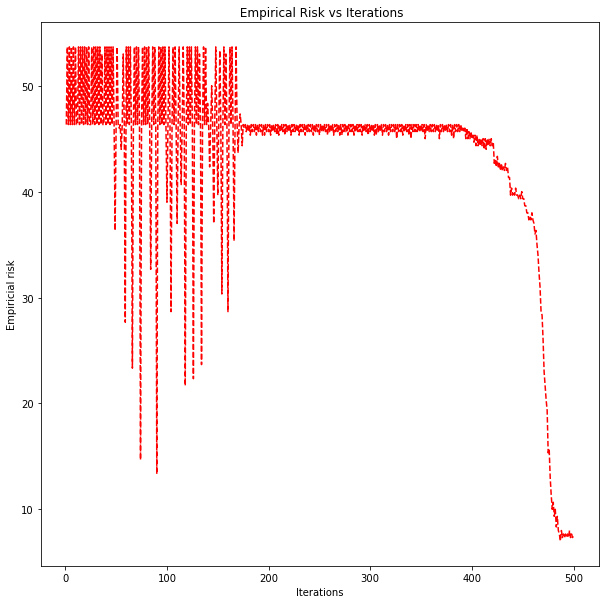


Note:
Empirical Risk reduces as iterations increase as expected


In [24]:
#Plot Empirical Risk vs Iterations
plt.figure(figsize=(10,10))
plt.plot(range(1,501), list_empirical_risk, 'r--')
plt.ylabel('Empiricial risk')
plt.xlabel('Iterations')
plt.title(' Empirical Risk vs Iterations')
plt.show()

#Find number of iterations which gives minimum risk 
#number_of_iterations=list_empirical_risk.index(min(list_empirical_risk))+1
#print("Iteration which produces least empirical risk:",number_of_iterations)

print('\nNote:')
print('Empirical Risk reduces as iterations increase as expected')

In [31]:
#Final Model
#Best model using the learning rate and number_of_iterations found
a,b=gradient_descent(500,learning_rate,lamda)
test_error=calculate_error(a,b,testData_norm,testLabels)-scalar
print("best model: learning rate:",learning_rate,'and lamda:',lamda,' for iterations:',500)
print('Test Error of the best model:',test_error)

print('\nNote:')
print('Test Error:',test_error, 'and Validation Error:',minimum_validation_error,'are close\n')

#Validation Accuracy vs Test Accuracy
test_accuracy=calculate_accuracy(a,b,testData_norm,testLabels)+scalar
validation_accuracy=calculate_accuracy(a,b,validationData_norm,validationLabels)

print('validation_accuracy:',validation_accuracy)
print('test_accuracy:',test_accuracy)

print('Note:')
print('Test Accuracy:',test_accuracy, 'and Validation Accuracy:',validation_accuracy,'are close\n')

best model: learning rate: 1 and lamda: 1e-07  for iterations: 500
Test Error of the best model: 9.3

Note:
Test Error: 9.3 and Validation Error: 8.0 are close

validation_accuracy: 92.0
test_accuracy: 90.7
Note:
Test Accuracy: 90.7 and Validation Accuracy: 92.0 are close

